In [11]:
from comp_model_3 import Grid_Sailing_Task_CM
import scipy
import time
from scipy.special import softmax
import scipy.optimize
import copy
import numpy
import math
import random
import matplotlib.pyplot as plt

In [2]:
grid_size = [5, 5]
key_map = [6,2,8]
env = Grid_Sailing_Task_CM(grid_size, key_map)

num_states = env.nS
num_actions = env.nA

q_values = numpy.zeros((env.nS, env.nA))

In [3]:
def ddm(y, I1, I2, I3, II, k):
    
    r1, r2, r3, rI = y
    dydt = [1/20*((-(k*rI))+I1+numpy.random.randn()), 1/20*((-(k*rI))+I2+numpy.random.randn()), 1/20*((-(k*rI))+I3+numpy.random.randn()),1/10*((-rI)+(((r1+r2+r3)*1)/3)+II+(1.5*numpy.random.randn()))]
    
    return dydt

def mysolver(y, I1, I2, I3, II, k, th):
    
    m = 0
    
    for _ in range(1000):
        m = m + 1
        changes = ddm(y, I1, I2, I3, II, k)
        y = numpy.add(y,changes)
        if(any(y[0:3]>=th)):
            break
    return numpy.argmax(y[0:3]), m


In [4]:
def dual(input_args):

    c = input_args[0]
    th = input_args[1]
    II = input_args[2]
    Scale = input_args[3]
    Ndt = input_args[4]
    trial = input_args[5]
    alpha = 0.4
    gamma = 0.9
    k = 1
    state = env.reset()
    print("new!")
    
    def find_best_action_with_prob(s,thresh,trial):
        
        action_values = q_values[s].copy()
        #thresh = numpy.exp(numpy.log(thresh) + (numpy.mean(action_values)/3))
        thresh = thresh*trial
        #action,time = mysolver([0,0,0,0], (c+action_values[0])/c, (c+action_values[1])/c, (c+action_values[2])/c, II, k, thresh)
        action,time = mysolver([0,0,0,0], action_values[0]/c, action_values[1]/c, action_values[2]/c, II, k, thresh)
        print(time)
        
        return action, time
    
    et = 0
    press_num = 0
    done = False
    res = 0
    sum_reward = 0
    RT = 0
    
    if (Scale == 0):
        loop = 15
    else: 
        loop = 100
        
    for _ in range(loop):
                
        action, rt = find_best_action_with_prob(state,th)
        if (press_num>0):
            if (Scale>0):
                et = et + (Scale*rt) + Ndt
            else:
                et = et + rt
        elif (Scale>0):
            RT = rt + (Scale*rt) + Ndt

        if (Scale>0):
            if ((RT+et)>6000):
                et = et-(Scale*rt)-Ndt
                break
        press_num = press_num + 1
        
        new_state, reward, done, info = env.step(action)
        if done:
            reward = reward - sum_reward
        sum_reward += reward
        q_values[state][action] = (1 - alpha) * q_values[state][action]+ alpha * (reward + gamma * numpy.max(q_values[new_state]))
        state = new_state
        
        if done:
            break
    
    if done:
        res = 1
    #print(res)
            
    return res,et,press_num,sum_reward

In [5]:
exec_time = numpy.zeros(40)
scale = numpy.zeros(30)
ndt = numpy.zeros(30)
for i in range(30):
    trials = 0
    while trials<40:
        res,total,num_moves,rew = dual([1, 1, 1, 0, 0, trials])
        exec_time[trials]  = (total/(num_moves))
        trials = trials + res
    timediff = (numpy.max(exec_time)-numpy.min(exec_time))
    scale[i] = (270/timediff)
    ndt[i] = (250-(scale[i]*exec_time[19]))
    q_values = numpy.zeros((env.nS, env.nA))
s = numpy.sum(scale)/30
n = numpy.sum(ndt)/30
print(numpy.min(exec_time))
print(scale)
print(ndt)

new!
384
30
188
40
53
53
256
13
415
44
160
70
40
41
new!
39
233
51
136
1000
33
19
25
58
245
36
427
new!
131
75
24
349
36
41
28
526
37
31
256
186
31
58
1
new!
329
69
29
21
29
95
88
1000
24
145
528
36
75
288
301
new!
166
241
122
27
54
145
48
48
70
73
24
1
new!
236
122
88
122
74
1000
100
67
582
371
202
2
1
new!
365
245
95
41
74
66
1
1
new!
1000
328
409
102
69
261
539
169
148
126
2
1
1
new!
395
228
522
1
1
1
new!
308
139
1000
5
1
1
new!
832
269
33
1
1
1
new!
461
237
2
1
1
1
new!
1000
301
178
1
1
1
1
new!
308
21
1
1
1
1
new!
159
2
1
1
1
1
new!
38
1
1
1
1
1
new!
5
1
1
1
1
1
new!
2
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
707
146
273


212
356
141
47
new!
1000
318
1000
191
108
1
new!
491
161
326
125
212
108
1
new!
520
205
1000
178
2
1
new!
329
198
443
99
86
75
740
173
72
151
151
211
259
108
853
new!
666
974
292
77
103
131
1000
162
100
439
299
127
1
1
new!
927
287
335
141
177
5
1
1
new!
444
322
132
217
329
640
101
1
1
1
new!
320
241
143
86
156
1
1
1
new!
792
348
8
1
1
1
new!
546
566
292
2
1
1
new!
1000
93
2
1
1
1
new!
539
7
1
1
1
1
new!
108
2
1
1
1
1
new!
36
1
1
1
1
1
new!
5
1
1
1
1
1
new!
3
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
412
548
365
48
922
19
28
44
81
29
242
40
38
16
111
new!
41
330
37
37
196
44
21
48
new!
31
1000
79
206
38
31
397
22
170
84
60
162
2

1000
419
282
223
2
1
1
1
new!
370
126
1
1
1
1
new!
330
5
1
1
1
1
new!
73
2
1
1
1
1
new!
28
1
1
1
1
1
new!
4
1
1
1
1
1
new!
2
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1000
22
54
551
385
509
32
129
359
214
428
161
288
37
29
new!
34
23
35
30
83
21
34
30
128
24
25
1000
57
26
61
new!
107
77
29
1000
289
243
193
114
26
40
59
new!
218
185
68
51
45
38
31
75
34
32
67
204
75
32
68
new!
237
241
196
47
48
79
59
35
24
162
33
36
346
180
596
new!
214
111
148
111
1000
141
386
388
28
74
16
new!
813
99
151
135
100
100
1
new!
751
246
503
88
81
133
77
360
89
80
349
462
100
73
120
new!
457
212
194
1000
155
20
353
192
169
379
148
313

506
254
51
new!
365
203
432
1000
181
32
97
36
87
281
132
368
92
49
43
new!
534
83
90
94
69
25
80
330
308
1000
241
24
new!
355
99
151
64
123
27
new!
963
262
189
462
80
71
220
212
79
105
375
210
84
95
185
new!
202
272
93
119
30
230
279
210
560
267
204
385
96
85
142
new!
311
175
240
910
1000
195
210
81
57
37
60
1
new!
657
243
453
367
111
180
1000
189
111
229
1000
99
213
214
292
new!
459
711
249
96
57
1
new!
344
978
467
470
679
245
166
80
105
1
new!
1000
606
371
130
148
194
192
391
403
788
160
120
161
2
1
new!
1000
331
403
390
332
11
1
1
new!
470
495
157
2
1
1
new!
358
227
1000
177
105
129
2
1
new!
763
689
31
1
1
1
new!
666
1000
3
1
1
1
new!
1000
133
2
1
1
1
new!
1000
13
1
1
1
1
new!
117
3
1
1
1
1
new!
40
2
1
1
1
1
new!
7
1
1
1
1
1
new!
3
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1


In [6]:
q_values = numpy.zeros((env.nS, env.nA))
exec_time = numpy.zeros(50)
move_num = numpy.zeros(50)
result = numpy.zeros(50)
reward = numpy.zeros(50)
for i in range(20):
    q_values = numpy.zeros((env.nS, env.nA))
    for j in range(49):
        result[j],ET,MN,rew = dual([1, 1, 1, s*1, n*1, j])
        exec_time[j] = exec_time[j] + ET
        move_num[j] = move_num[j] + MN
        if (rew>0):
            reward[j] = reward[j] + rew
exec_time = (exec_time/20)
move_num = (move_num/20)
reward  = (reward/20)

new!
653
132
16
496
432
530
51
413
57
33
new!
53
31
140
87
44
205
181
328
37
90
47
206
48
30
22
32
49
new!
1000
89
28
39
116
15
81
37
48
59
37
58
36
66
new!
293
72
1000
41
208
31
68
137
72
142
537
123
new!
259
185
512
32
73
237
67
140
198
80
31
100
80
279
new!
181
95
43
35
78
60
195
37
new!
592
306
272
200
20
37
465
283
115
24
new!
381
86
237
78
122
462
299
148
1000
99
68
new!
270
243
243
105
94
201
454
93
81
231
335
102
74
new!
503
212
148
170
205
248
608
124
136
1
new!
476
462
416
188
323
1000
193
273
new!
922
398
260
67
174
281
313
72
188
new!
596
161
384
198
59
30
70
1
new!
608
262
250
150
916
965
340
new!
656
1000
353
104
201
110
499
547
new!
1000
353
183
138
2
1
new!
1000
432
181
101
65
1
new!
1000
395
398
434
128
154
378
294
new!
390
366
339
292
97
1
1
new!
575
324
1000
172
104
3
1
1
new!
520
663
433
12
1
1
new!
794
390
157
1
1
1
new!
703
512
1000
150
1
1
1
new!
1000
635
5
1
1
1
new!
879
1000
1000
232
132
295
new!
1000
458
70
1
1
1
1
new!
241
6
1
1
1
1
new!
73
2
1
1
1
1
new!
29


575
402
199
170
47
new!
352
72
46
31
746
196
157
35
28
62
20
75
33
92
27
new!
218
84
1000
25
70
493
212
424
37
68
35
156
new!
153
170
148
86
34
31
new!
424
260
72
171
86
60
106
232
39
32
131
84
87
154
34
new!
360
114
95
396
188
1000
218
576
148
512
new!
183
251
192
203
86
1
new!
462
234
121
258
348
311
422
94
66
218
458
new!
1000
184
1000
101
444
359
96
new!
881
279
263
1000
94
207
1
new!
1000
373
269
363
61
370
160
303
new!
283
1000
325
165
406
102
79
678
457
new!
387
241
83
119
67
2
1
new!
792
404
289
100
99
96
1
1
new!
648
321
465
6
1
1
new!
1000
418
484
1
1
1
new!
1000
1000
284
152
1
1
1
new!
923
484
232
422
2
1
1
new!
345
875
521
228
685
269
3
1
1
1
new!
520
317
1
1
1
1
new!
1000
41
1
1
1
1
new!
206
2
1
1
1
1
new!
51
1
1
1
1
1
new!
8
1
1
1
1
1
new!
2
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new

35
507
97
85
211
new!
331
84
83
49
365
1
new!
470
221
586
85
125
690
222
220
187
142
new!
273
398
369
98
76
191
210
129
218
115
2
1
new!
322
371
1000
132
1
1
new!
511
181
135
7
1
1
new!
939
293
135
138
2
1
1
new!
1000
1000
258
89
111
1
1
1
new!
614
311
270
13
1
1
1
new!
430
316
2
1
1
1
new!
464
101
1
1
1
1
new!
530
3
1
1
1
1
new!
68
2
1
1
1
1
new!
19
1
1
1
1
1
new!
3
1
1
1
1
1
new!
2
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
1
1
1
1
1
1
new!
170
182
488
292
461
415
32
118
31
299
39
259
new!
28
1000
88
24
106
46
54
360
30
365
53
39
14
43
343
new!
78
66
1000
639
3

Text(0, 0.5, 'Mean Execution Time')

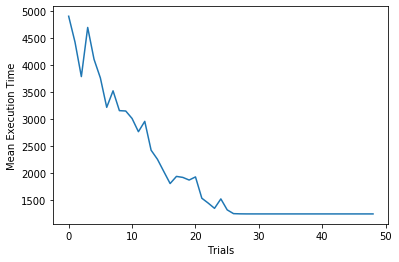

In [22]:
fig1 = plt.figure()
plt.plot(exec_time[0:49])
plt.xlabel('Trials')
plt.ylabel('Mean Execution Time')
#fig1.savefig('Exec_Time.jpg')

Text(0, 0.5, 'Average Number of Moves')

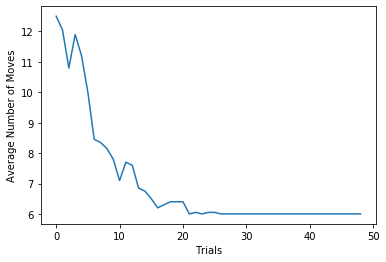

In [8]:
fig2 = plt.figure()
plt.plot(move_num[0:49])
plt.xlabel('Trials')
plt.ylabel('Average Number of Moves')
#fig2.savefig('Move_Num.jpg')

Text(0, 0.5, 'Mean Reward')

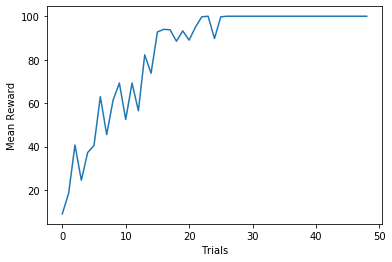

In [9]:
fig3 = plt.figure()
plt.plot(reward[0:49])
plt.xlabel('Trials')
plt.ylabel('Mean Reward')
#fig3.savefig('Mean_Reward.jpg')

Text(0, 0.5, 'Execution Time Per Keypress')

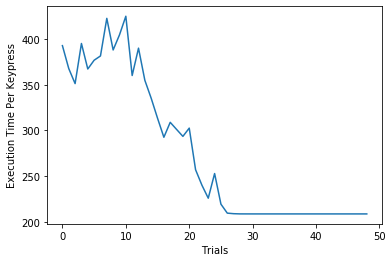

In [10]:
temp = numpy.divide(exec_time[0:49],move_num[0:49])
plt.plot(temp[0:49])
plt.xlabel('Trials')
plt.ylabel('Execution Time Per Keypress')

In [11]:
abs(1535-exec_time[24])

6.208825317570472

In [12]:
exec_time[24]

1528.7911746824295

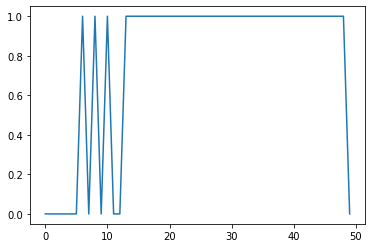

In [13]:
plt.plot(result)

In [14]:
q_values

array([[ -4.704     ,  -4.704     ,  -0.17914368],
       [  0.        ,   0.        ,   0.        ],
       [ -2.4       ,   0.        ,  -1.2       ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,  -2.4       ,  -1.2       ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [ -1.2       ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [ -9.0392064 ,  -7.7010432 ,  66.14915686],
       [  0.        ,   0.        ,   0.        ],
       [ -7.33770093,  -3.84      ,  29.09981184],
       [  0.        ,   0.        ,   0.        ],
       [ -4.52143104,  -2.4       ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  -2.4       ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,  -2.4       ,   0.        ],
       [  0.        ,   0.     

In [15]:
A = numpy.array([1,2,3,4])
numpy.argmax(A)

3

In [16]:
s

1.0622258738121702

In [17]:
n

249.11481177182318

In [18]:
A = [1,1]
B = [1,2]
C = [A,B]
numpy.array(C)-1

array([[0, 0],
       [0, 1]])

In [19]:
A = [1+numpy.random.randn(),1+numpy.random.randn()]
A

[1.965090636286217, 2.2862050968267074]

In [20]:
numpy.mean(numpy.array([1,2,3]))

2.0

In [13]:
import wfpt
import numpy as np

x0 = -0.6
t0 = 0.3
a = 0.1
z = 1
s = 1
dt = 0.001 # only relevant for drawing random RTs

In [14]:
simulatedRTs = np.array([wfpt.simulate_wfpt(x0, t0, a, z, dt)[0] for i in range(500)]) 
np.mean(np.abs(simulatedRTs))

1.003692

In [15]:
wfpt.wfpt_rt(x0, t0, a, z, s)

0.9641388224456926

In [16]:
wfpt.wfpt_er(x0, t0, a, z, s)

0.48014645505001946

In [17]:
wfpt.wfpt_dt_upper(x0, t0, a, z, s)

1.2764636234782631

In [18]:
wfpt.wfpt_dt_lower(x0, t0, a, z, s)

0.47791074934455663

(array([  1.,   0.,   6.,  25.,  62., 278.,  33.,  70.,  19.,   6.]),
 array([-5.9020e+00, -4.9175e+00, -3.9330e+00, -2.9485e+00, -1.9640e+00,
        -9.7950e-01,  5.0000e-03,  9.8950e-01,  1.9740e+00,  2.9585e+00,
         3.9430e+00]),
 <a list of 10 Patch objects>)

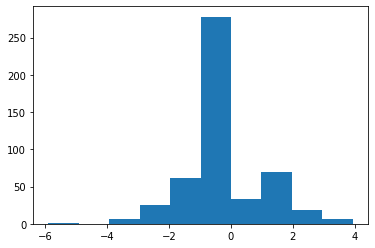

In [19]:
plt.hist(simulatedRTs)